<a href="https://colab.research.google.com/github/stgoa/recursiveseriation/blob/main/examples/example_points_in_circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Optimal Algorithm for Strict Circular Seriation

Author: Santiago Armstrong

About this repository:

This repository contains a Python implementation of the algorithm introduced in the paper '*An Optimal Algorithm for Strict Circular Seriation*'. Check the preprint on [ArXiv][1]

**Abstract:**

We study the problem of circular seriation, where we are given a matrix of pairwise dissimilarities between n objects, and the goal is to find a *circular order* of the objects in a manner that is consistent with their dissimilarity. This problem is a generalization of the classical *linear seriation* problem where the goal is to find a *linear order*, and for which optimal $O(n^2)$ algorithms are known. Our contributions can be summarized as follows. First, we introduce *circular Robinson matrices* as the natural class of dissimilarity matrices for the circular seriation problem. Second, for the case of *strict circular Robinson dissimilarity matrices* we provide an optimal $O(n^2)$ algorithm for the circular seriation problem. Finally, we propose a statistical model to analyze the well-posedness of the circular seriation problem for large n. In particular, we establish $O(log(n)/n)$ rates on the distance between any circular ordering found by solving the circular seriation problem to the underlying order of the model, in the Kendall-tau metric.



[1]: https://arxiv.org/abs/2106.05944

If you want to run this in Google Colab, make sure to clone the repository:

    !git clone https://github.com/stgoa/recursiveseriation.git
    %cd recursiveseriation

In [1]:
%ls

example_points_in_circle.ipynb  minimal_example.ipynb


## Distance matrix of points in the unt circle

In [2]:
from recursiveseriation.solver.seriation import RecursiveSeriation
from recursiveseriation.utils import  (random_permutation, inpermute, permute, inversepermutation)
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)
np.random.seed(42)

In [3]:
# generate points in the unit circle
points_in_circle = [[np.cos(2*np.pi*x), np.sin(2*np.pi*x)] for x in np.linspace(0,1,100)]

In [4]:
# randomly permute them
points_in_circle = permute(points_in_circle, random_permutation(len(points_in_circle)))

In [5]:
# compute the distance matrix
D = np.zeros((len(points_in_circle), len(points_in_circle)))

for i in range(len(points_in_circle)):
    for j in range(len(points_in_circle)):
        D[i, j] = np.linalg.norm(
            np.asarray(points_in_circle[i])
            - np.asarray(points_in_circle[j])
        )

Text(0.5, 1.0, 'Input distance matrix')

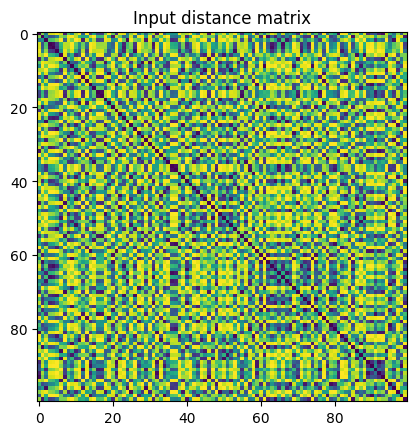

In [6]:
plt.imshow(D)
plt.title("Input distance matrix")

In [7]:
print("Running algorithm...")

rs = RecursiveSeriation(dissimilarity=lambda x,y: D[x,y], n=len(points_in_circle))
order = rs.sort()
print("Finished!")

Running algorithm...
Finished!


Text(0.5, 1.0, 'Reordered distance matrix')

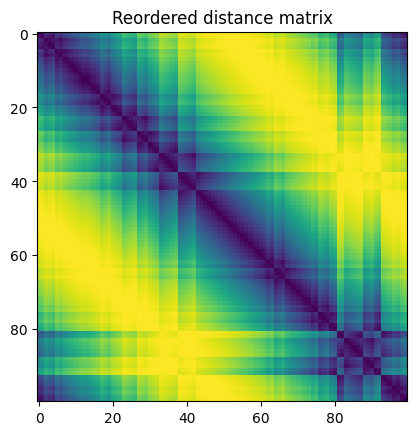

In [8]:
D_rec = permute(D,order)
plt.imshow(D_rec)
plt.title("Reordered distance matrix")

Text(0.5, 1.0, 'The original points follow no particular ordering')

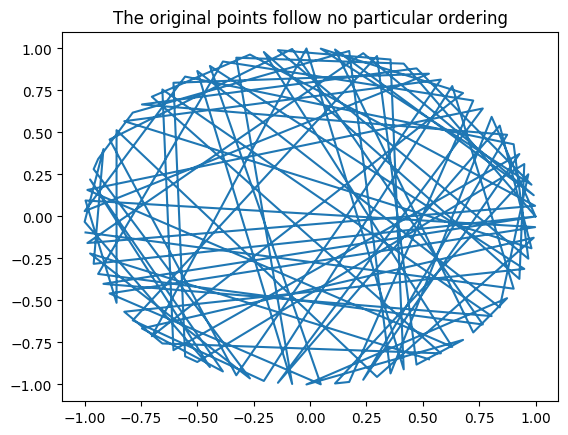

In [9]:
P = np.asarray(points_in_circle)
x, y = P[:,0], P[:,1]
plt.plot(x,y, ls="-")
plt.title("The original points follow no particular ordering")

Text(0.5, 1.0, 'After seriation, they follow the circular order')

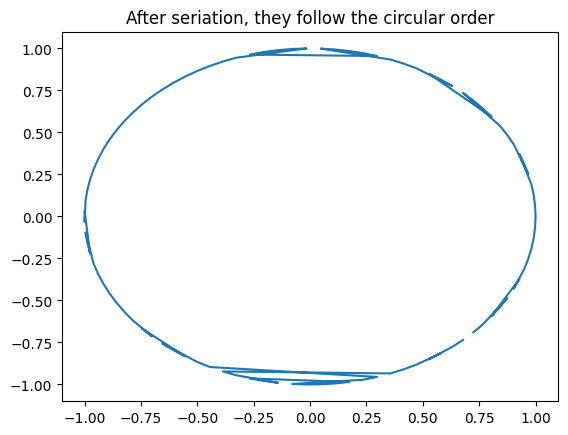

In [10]:
P = np.asarray(permute(points_in_circle,order))
x, y = P[:,0], P[:,1]
plt.plot(x,y, ls="-")
plt.title("After seriation, they follow the circular order")